In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [6]:
dataset = pd.read_csv('data/star.csv')

In [7]:
dataset.info()
dataset_x = dataset.drop('target', 1)
dataset_y = dataset['target']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean-profile        17898 non-null  float64
 1    sd-profile         17898 non-null  float64
 2    excess-profile     17898 non-null  float64
 3    skewness-profile   17898 non-null  float64
 4    mean-dm-curve      17898 non-null  float64
 5    sd-dm-curve        17898 non-null  float64
 6    excess-dm-curve    17898 non-null  float64
 7    skewness-dm-curve  17898 non-null  float64
 8   target              17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
dataset.corr()

,mean-profile,sd-profile,excess-profile,skewness-profile,mean-dm-curve,sd-dm-curve,excess-dm-curve,skewness-dm-curve,target
mean-profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
sd-profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
excess-profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
skewness-profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
mean-dm-curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
sd-dm-curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
excess-dm-curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
skewness-dm-curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


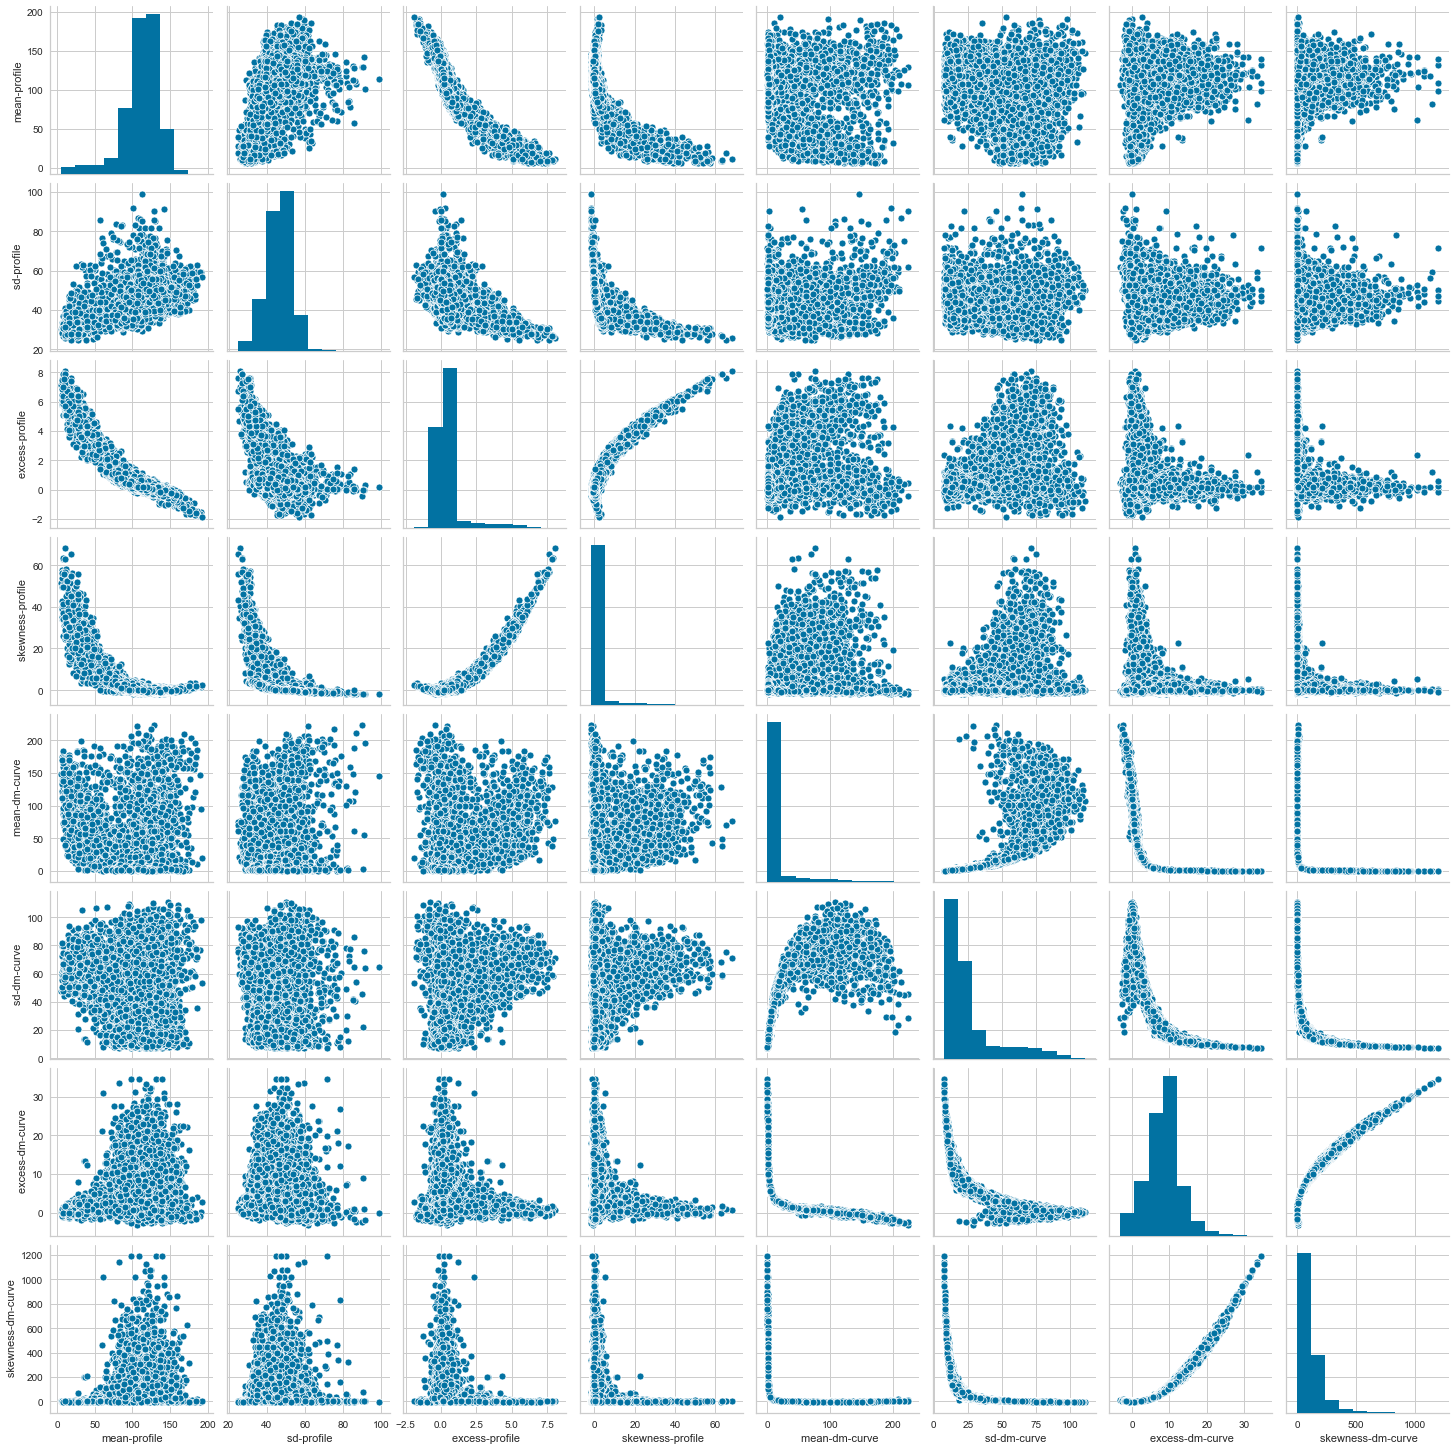

In [9]:
sns.pairplot(dataset_x)

Text(0.5, 1, 'Correlation Between Data')

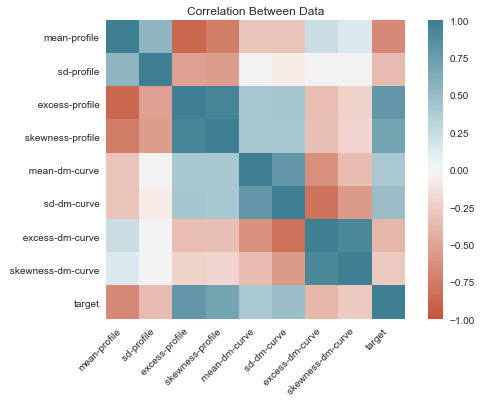

In [10]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Between Data')

In [11]:
dataset_x.columns.values

array(['mean-profile', ' sd-profile', ' excess-profile',
       ' skewness-profile', ' mean-dm-curve', ' sd-dm-curve',
       ' excess-dm-curve', ' skewness-dm-curve'], dtype=object)

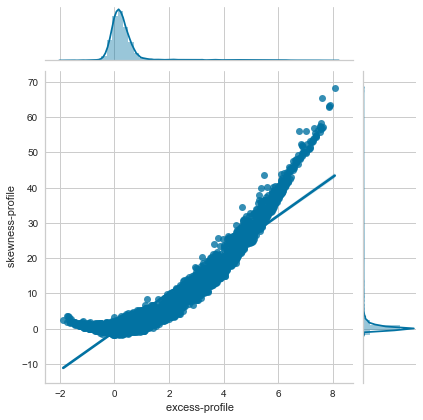

In [12]:
sns.jointplot(' excess-profile', ' skewness-profile', data=dataset_x, kind='reg')

In [13]:
mat_x = dataset_x.values
mat_y = dataset_y.values

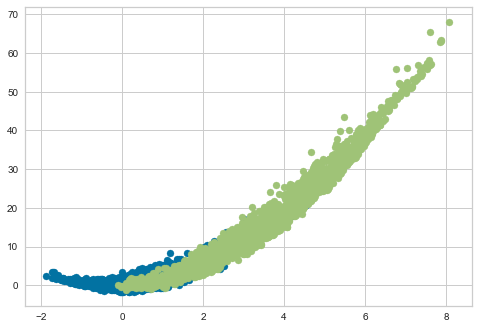

In [14]:
for i, j in enumerate(np.unique(mat_y)):
    plt.scatter(mat_x[mat_y == i, 2], mat_x[mat_y == j, 3],
                cmap = ListedColormap(('red', 'green'))(i), label=j)

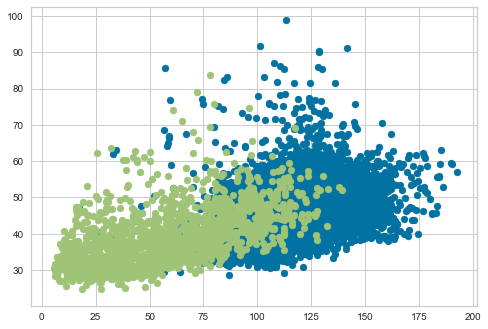

In [15]:
for i, j in enumerate(np.unique(mat_y)):
    plt.scatter(mat_x[mat_y == i, 0], mat_x[mat_y == j, 1],
                cmap = ListedColormap(('red', 'green'))(i), label=j)

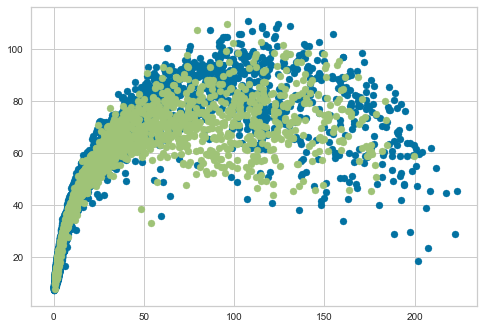

In [16]:
for i, j in enumerate(np.unique(mat_y)):
    plt.scatter(mat_x[mat_y == i, 4], mat_x[mat_y == j, 5],
                cmap = ListedColormap(('red', 'green'))(i), label=j)

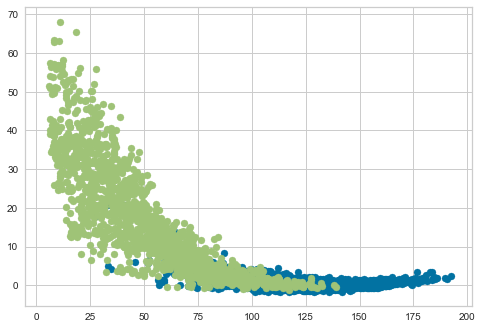

In [17]:
for i, j in enumerate(np.unique(mat_y)):
    plt.scatter(mat_x[mat_y == i, 0], mat_x[mat_y == j, 3],
                cmap = ListedColormap(('red', 'green'))(i), label=j)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_x,test_x,train_y,test_y = train_test_split(dataset_x, dataset_y, test_size = 0.25, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

class classification_hook:
    
    def __init__(self, x, y, x_, y_, dict_=False):
        
        self.x_test = x
        self.y_test = y
        self.x_train = x_
        self.y_train = y_
        self.dict_ins = {}
        self.dict = dict_
    
    def confusion(self, mat, classifier_):
        
        sns.heatmap(mat, annot=True, fmt='d')
        plt.title(classifier_)
        plt.show()
    
    def ADA(self):
        
        model = AdaBoostClassifier(n_estimators=100, random_state=0).fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'AdaBoostClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'AdaBoostClassifier')
    
    def GRAD_2(self):
        
        model = GradientBoostingClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'GradientBoostingClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'GradientBoostingClassifier')
    
    def LOG(self):
        
        model = LogisticRegression(max_iter = 9999).fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'Logistic Score: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'Logistic Classifier')
        
    
    def GRAD(self):
        
        model = SGDClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'SGDClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'SGDClassifier')
        
            
    def VECTOR(self):
        
        model = SVC().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'SVC: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'Support Vector Classifier')
    
    def KN(self):
        
        model = KNeighborsClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'KNeighborsClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'KNeighborsClassifier')
    
    def ense(self):
        
        model = RandomForestClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'RandomForestClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'RandomForestClassifier')
    
    def tree(self):
        
        model = DecisionTreeClassifier().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'DecisionTreeClassifier: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'DecisionTreeClassifier')
    
    def bayes(self):
        
        model = GaussianNB().fit(self.x_train, self.y_train)
        score = model.score(self.x_test, self.y_test)
        print(f'GaussianNB: {score * 100} % Acc')
        mat = confusion_matrix(self.y_test, model.predict(self.x_test))
        self.confusion(mat, 'GaussianNB')
    

    
    def start(self):
        
        print("""Staring Classification Training & Testing""")
        print()
        self.LOG()
        self.GRAD()
        self.VECTOR()
        self.KN()
        self.ense()
        self.tree()
        self.bayes()
        self.ADA()
        self.GRAD_2()
        

Staring Classification Training & Testing

Logistic Score: 97.81005586592178 % Acc


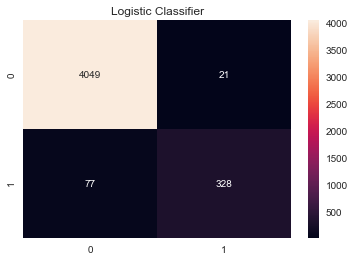

SGDClassifier: 97.47486033519553 % Acc


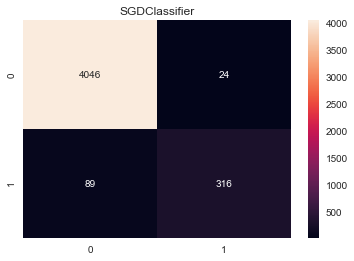

SVC: 97.40782122905028 % Acc


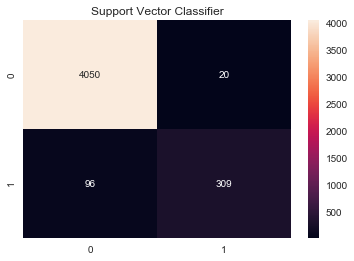

KNeighborsClassifier: 97.45251396648045 % Acc


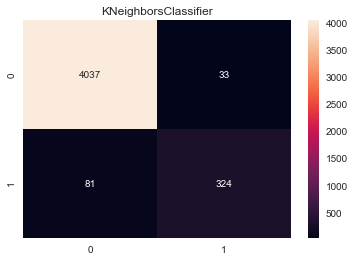

RandomForestClassifier: 98.01117318435755 % Acc


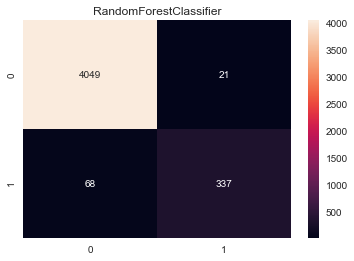

DecisionTreeClassifier: 96.89385474860335 % Acc


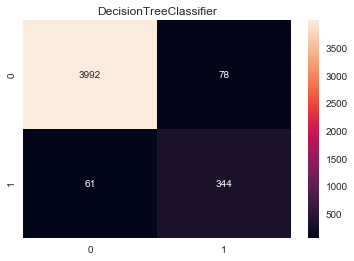

GaussianNB: 94.74860335195531 % Acc


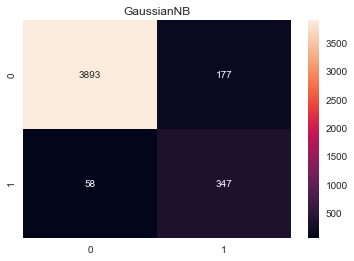

AdaBoostClassifier: 97.74301675977654 % Acc


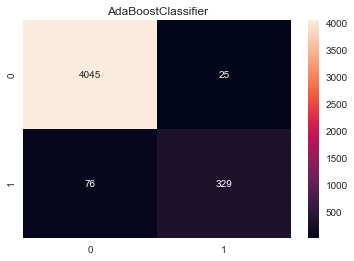

GradientBoostingClassifier: 97.74301675977654 % Acc


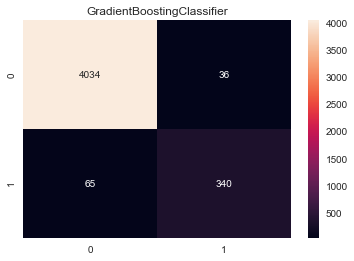

In [22]:
%matplotlib inline
classification_hook(test_x,test_y,train_x,train_y).start()

# Random Forest Classifier

In [23]:
dataset = pd.read_csv('data/star.csv')
dataset_x = dataset.drop('target', 1)
dataset_y = dataset['target']

In [24]:
train_x,test_x,train_y,test_y = train_test_split(dataset_x, dataset_y, test_size = 0.25, random_state=42)

In [25]:
Forest_Gini = RandomForestClassifier().fit(train_x, train_y)
Forest_Entropy = RandomForestClassifier(criterion = 'entropy').fit(train_x, train_y)

In [26]:
gini = Forest_Gini.score(test_x, test_y) * 100
entropy = Forest_Entropy.score(test_x, test_y) * 100
gini, entropy

(98.01117318435755, 98.03351955307262)

In [27]:
# As Expected Entropy is doing better ! Because the data seems to be stacked in one place of graphs.

In [28]:
Forest_Entropy.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Random Forest (Entropy) Tuning

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion': ['entropy'],
}

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
forest = RandomForestClassifier()

In [73]:
grid_model = GridSearchCV(estimator = forest, param_grid = param_grid, cv = 3, n_jobs = -1, verbose=2)

In [74]:
grid_model.fit(train_x, train_y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 46.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 62.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [75]:
best_model = grid_model.best_estimator_

In [78]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 90,
 'max_features': 2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
"""
Default is Best.
"""

'\nDefault is Best.\n'

In [ ]:
dataset = pd.read_csv('data/star.csv')
dataset_x = dataset.drop('target', 1)
dataset_y = dataset['target']

In [ ]:
model = RandomForestClassifier(criterion = 'entropy')

In [30]:
import pickle

In [ ]:
score = 0
for i in range(15):
    train_x,test_x,train_y,test_y = train_test_split(dataset_x, dataset_y, test_size = 0.25, random_state=42)
    model.fit(train_x, train_y)
    score_s = model.score(test_x, test_y)
    if score_s > score:
        score  = score_s
        pickle.dump(model, open('models/stars.pkl', 'wb'))
    print(score_s)
print('Highest Score Was: ', score)

In [31]:
best_model = pickle.load(open('models/stars.pkl', 'rb'))

In [32]:
tuned_score = best_model.score(test_x, test_y) * 100

In [33]:
print(
    f"""
    Old Score: {entropy} %
    New Score: {tuned_score} %
    Improvement" {tuned_score - entropy} %
    """
)


    Old Score: 98.03351955307262 %
    New Score: 98.07821229050279 %
    Improvement" 0.044692737430167995 %
    


# Extra

In [34]:
# Mean Profile
# Maen DM Curve

In [35]:
dataset_x.columns.values

array(['mean-profile', ' sd-profile', ' excess-profile',
       ' skewness-profile', ' mean-dm-curve', ' sd-dm-curve',
       ' excess-dm-curve', ' skewness-dm-curve'], dtype=object)

In [36]:
predictions = best_model.predict(test_x)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
mat_t_x = test_x.values

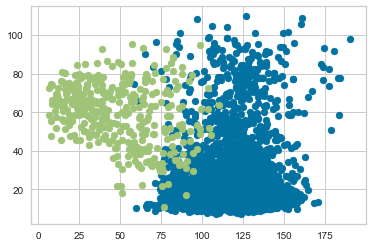

In [38]:
for i, j in enumerate(np.unique(predictions)):
    plt.scatter(mat_t_x[predictions == i, 0], mat_t_x[predictions == j, 5],
                cmap = ListedColormap(('red', 'green'))(i), label = j)

In [43]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

C:\Users\habab\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


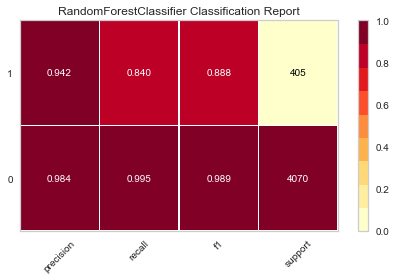

In [44]:
visualizer = ClassificationReport(best_model, classes=['0', '1'], support=True)

visualizer.fit(train_x, train_y)        # Fit the visualizer and the model
visualizer.score(test_x, test_y)        # Evaluate the model on the test data
visualizer.show()     